In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
online_df = pd.read_csv("C:\\Users\\Sharang\\Python Modules jupyter\\DataSets\\Codes-Data-Files\\Machine Learning (Codes and Data Files)\\Data\\Online Retail.csv", encoding='latin1')

In [3]:
online_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
online_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
online_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
online_df.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
online_df = online_df[pd.notnull(online_df["CustomerID"])]

In [8]:
online_df.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
online_df['InvoiceDate'] = pd.to_datetime(online_df['InvoiceDate']).dt.date


In [595]:
online_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [10]:
online_1 = online_df[(online_df.InvoiceDate >= dt.date(2011,6,1)) 
                     & (online_df.InvoiceDate <= dt.date(2011,11,30))]


In [11]:
online_1.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
516379,C579886,22197,POPCORN HOLDER,-1,2011-11-30,0.85,15676.0,United Kingdom
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30,3.29,15676.0,United Kingdom
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30,1.25,16717.0,United Kingdom
516382,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30,7.95,16717.0,United Kingdom
516383,C579887,23490,T-LIGHT HOLDER HANGING LOVE BIRD,-3,2011-11-30,3.75,16717.0,United Kingdom


In [13]:
online_1.loc[:,'Recency'] = pd.to_datetime(online_1['InvoiceDate']).dt.month



In [14]:
online_1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
209029,555156,23299,FOOD COVER WITH BEADS SET 2,6,2011-06-01,3.75,15643.0,United Kingdom,6
209030,555156,22847,BREAD BIN DINER STYLE IVORY,1,2011-06-01,16.95,15643.0,United Kingdom,6
209031,555157,23075,PARLOUR CERAMIC WALL HOOK,16,2011-06-01,4.15,15643.0,United Kingdom,6
209032,555157,47590B,PINK HAPPY BIRTHDAY BUNTING,6,2011-06-01,5.45,15643.0,United Kingdom,6
209033,555157,22423,REGENCY CAKESTAND 3 TIER,4,2011-06-01,12.75,15643.0,United Kingdom,6


In [15]:
online_1.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
516379,C579886,22197,POPCORN HOLDER,-1,2011-11-30,0.85,15676.0,United Kingdom,11
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30,3.29,15676.0,United Kingdom,11
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30,1.25,16717.0,United Kingdom,11
516382,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30,7.95,16717.0,United Kingdom,11
516383,C579887,23490,T-LIGHT HOLDER HANGING LOVE BIRD,-3,2011-11-30,3.75,16717.0,United Kingdom,11


In [16]:
j = 5
for i in range(6,12):
    online_1.loc[online_1['Recency'] == i,'Recency'] = j
    j = j-1

In [17]:
online_1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
209029,555156,23299,FOOD COVER WITH BEADS SET 2,6,2011-06-01,3.75,15643.0,United Kingdom,5
209030,555156,22847,BREAD BIN DINER STYLE IVORY,1,2011-06-01,16.95,15643.0,United Kingdom,5
209031,555157,23075,PARLOUR CERAMIC WALL HOOK,16,2011-06-01,4.15,15643.0,United Kingdom,5
209032,555157,47590B,PINK HAPPY BIRTHDAY BUNTING,6,2011-06-01,5.45,15643.0,United Kingdom,5
209033,555157,22423,REGENCY CAKESTAND 3 TIER,4,2011-06-01,12.75,15643.0,United Kingdom,5


In [18]:
online_1.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
516379,C579886,22197,POPCORN HOLDER,-1,2011-11-30,0.85,15676.0,United Kingdom,0
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30,3.29,15676.0,United Kingdom,0
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30,1.25,16717.0,United Kingdom,0
516382,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30,7.95,16717.0,United Kingdom,0
516383,C579887,23490,T-LIGHT HOLDER HANGING LOVE BIRD,-3,2011-11-30,3.75,16717.0,United Kingdom,0


In [19]:
online_1.loc[:,"Monetary"] = online_1["Quantity"] * online_1["UnitPrice"]

In [20]:
online_1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Monetary
209029,555156,23299,FOOD COVER WITH BEADS SET 2,6,2011-06-01,3.75,15643.0,United Kingdom,5,22.50
209030,555156,22847,BREAD BIN DINER STYLE IVORY,1,2011-06-01,16.95,15643.0,United Kingdom,5,16.95
209031,555157,23075,PARLOUR CERAMIC WALL HOOK,16,2011-06-01,4.15,15643.0,United Kingdom,5,66.40
209032,555157,47590B,PINK HAPPY BIRTHDAY BUNTING,6,2011-06-01,5.45,15643.0,United Kingdom,5,32.70
209033,555157,22423,REGENCY CAKESTAND 3 TIER,4,2011-06-01,12.75,15643.0,United Kingdom,5,51.00


In [21]:
online_1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Monetary
209029,555156,23299,FOOD COVER WITH BEADS SET 2,6,2011-06-01,3.75,15643.0,United Kingdom,5,22.50
209030,555156,22847,BREAD BIN DINER STYLE IVORY,1,2011-06-01,16.95,15643.0,United Kingdom,5,16.95
209031,555157,23075,PARLOUR CERAMIC WALL HOOK,16,2011-06-01,4.15,15643.0,United Kingdom,5,66.40
209032,555157,47590B,PINK HAPPY BIRTHDAY BUNTING,6,2011-06-01,5.45,15643.0,United Kingdom,5,32.70
209033,555157,22423,REGENCY CAKESTAND 3 TIER,4,2011-06-01,12.75,15643.0,United Kingdom,5,51.00


In [22]:
RFM_DF = online_1.groupby("CustomerID").agg({"InvoiceNo": "count","Monetary": sum,"Recency":min})

In [23]:
RFM_DF.columns


Index(['InvoiceNo', 'Monetary', 'Recency'], dtype='object')

In [25]:
RFM_DF.reset_index()

,CustomerID,InvoiceNo,Monetary,Recency
0,12347.0,87,2261.75,1
1,12348.0,3,310.00,2
2,12349.0,73,1757.55,0
3,12352.0,47,944.23,0
4,12356.0,2,58.35,0
...,...,...,...,...
3494,18278.0,9,173.90,2
3495,18281.0,7,80.82,5
3496,18282.0,8,98.76,3
3497,18283.0,474,1351.83,0


In [27]:
scaler = StandardScaler()
scaler_new = scaler.fit_transform(RFM_DF[["InvoiceNo", "Monetary", "Recency"]])

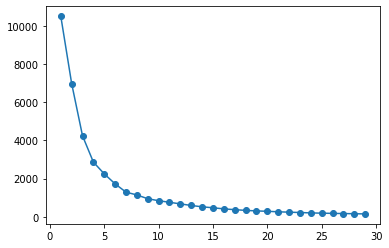

In [31]:
cluster_range = range(1, 30)
cluster_error = []
for i in cluster_range:
    cluster = KMeans(i)
    cluster.fit(scaler_new)
    cluster_error.append(cluster.inertia_)

plt.figure(figsize=(6,4))
plt.plot(cluster_range, cluster_error, marker = "o")

In [52]:
K= 4
new_cluster = KMeans(n_clusters = 4)
new_cluster.fit(scaler_new)
RFM_DF["clust_id"] = new_cluster.labels_

In [53]:
RFM_DF[RFM_DF["clust_id"] == 0]

,InvoiceNo,Monetary,Recency,clust_id
CustomerID,,,,
12347.0,87,2.261750e+03,1,0
12349.0,73,1.757550e+03,0,0
12352.0,47,9.442300e+02,0,0
12356.0,2,5.835000e+01,0,0
12357.0,131,6.207670e+03,0,0
...,...,...,...,...
18274.0,22,1.243450e-14,0,0
18276.0,16,3.233600e+02,0,0
18277.0,8,1.103800e+02,1,0


In [54]:
RFM_DF[RFM_DF["clust_id"] == 1]

,InvoiceNo,Monetary,Recency,clust_id
CustomerID,,,,
12348.0,3,310.00,2,1
12358.0,12,484.86,4,1
12363.0,7,252.90,3,1
12372.0,13,383.12,2,1
12378.0,219,4008.62,3,1
...,...,...,...,...
18268.0,2,0.00,4,1
18273.0,1,102.00,2,1
18278.0,9,173.90,2,1


In [55]:
RFM_DF[RFM_DF["clust_id"] == 2]

,InvoiceNo,Monetary,Recency,clust_id
CustomerID,,,,
12415.0,499,73435.25,0,2
14156.0,895,72038.16,0,2
14646.0,1201,157092.88,0,2
17450.0,222,131317.33,0,2
18102.0,331,180469.05,0,2


In [57]:
RFM_DF[RFM_DF["clust_id"] == 3]

,InvoiceNo,Monetary,Recency,clust_id
CustomerID,,,,
12748.0,2958,18679.01,0,3
14096.0,4598,49285.37,0,3
14911.0,3944,91522.29,0,3
17841.0,5391,26429.50,0,3
